<h1><center>ClimateAi Coding Challenge

<h2><center>By Scott Burstein


# Part 1: Summary Statistics and Data Transformation


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

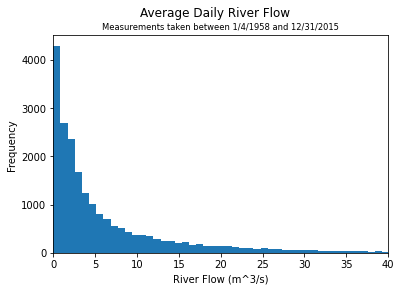

<Figure size 432x288 with 0 Axes>

In [ ]:
df = pd.read_csv("RiverData.csv")

%matplotlib inline
plt.hist(df.flow, bins = 100)
plt.xlabel("River Flow (m^3/s)")
plt.ylabel("Frequency")
plt.title("Measurements taken between 1/4/1958 and 12/31/2015", size="small")
plt.suptitle("Average Daily River Flow")
plt.xlim(0, 40)
plt.show()
plt.savefig("DailyRiverFlow_Histogram")

## Pseudocode for derive_nth_day_feature function:
`N = 1` indicates deriving values from 1 day prior
<br> <br>
target measurement of flow:
`feature = "obs_tas_1"`

total number of rows:
`rows = df.shape[0]`
<br> <br>
A list representing Nth prior measurements of feature:
`nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]`
<br> <br>
notice that the front of the list needs to be padded with N.
None values to maintain the constistent rows length for each N.
<br> <br>
Make a new column name of feature_N and add to DataFrame:

`col_name = "{}_{}".format(feature, N)
df[col_name] = nth_prior_measurements`

In [ ]:
def derive_nth_day_feature(df, feature, N):
    rows = df.shape[0]
    nth_prior_measurements = [None]*N + [df[feature][i-N] for i in range(N, rows)]
    col_name = "{}_{}".format(feature, N)
    df[col_name] = nth_prior_measurements

features = ["date",
            "obs_tas_1", "obs_tas_2", "obs_tas_3",
            "obs_tas_4", "obs_tas_5", "obs_tas_6", 
            "obs_tas_7", "obs_tas_8", "obs_tas_9",
            "obs_pr_1", "obs_pr_2", "obs_pr_3", 
            "obs_pr_4", "obs_pr_5", "obs_pr_6", 
            "obs_pr_7", "obs_pr_8", "obs_pr_9"]


for feature in features:
    if feature != 'date':
        for N in range(1, 4): # N days (1,4) is 3 days prior
            derive_nth_day_feature(df, feature, N)

Make list of original features without desired variables.

In [ ]:
to_remove = [feature 
             for feature in features 
             if feature not in ["obs_tas_1", "obs_tas_2", "obs_tas_3", 
                                "obs_tas_4", "obs_tas_5", "obs_tas_6", 
                                "obs_tas_7", "obs_tas_8", "obs_tas_9",
                                "obs_pr_1", "obs_pr_2", "obs_pr_3", 
                                "obs_pr_4", "obs_pr_5", "obs_pr_6", 
                                "obs_pr_7", "obs_pr_8", "obs_pr_9"
                                ]
            ]

Make a list of columns to keep.

In [ ]:
to_keep = [col for col in df.columns if col not in to_remove]


Select only the columns in to_keep and assign to df.


In [ ]:
df = df[to_keep]
df.columns

print("Dataframe df index dtype and columns, non-null values and memory usage:")
print(df.info())

Dataframe df index dtype and columns, non-null values and memory usage:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21178 entries, 0 to 21177
Data columns (total 73 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flow         21178 non-null  float64
 1   obs_tas_1    21178 non-null  float64
 2   obs_tas_2    21178 non-null  float64
 3   obs_tas_3    21178 non-null  float64
 4   obs_tas_4    21178 non-null  float64
 5   obs_tas_5    21178 non-null  float64
 6   obs_tas_6    21178 non-null  float64
 7   obs_tas_7    21178 non-null  float64
 8   obs_tas_8    21178 non-null  float64
 9   obs_tas_9    21178 non-null  float64
 10  obs_pr_1     21178 non-null  float64
 11  obs_pr_2     21178 non-null  float64
 12  obs_pr_3     21178 non-null  float64
 13  obs_pr_4     21178 non-null  float64
 14  obs_pr_5     21178 non-null  float64
 15  obs_pr_6     21178 non-null  float64
 16  obs_pr_7     21178 non-null  float64
 17  obs_pr_8     211

Calculate interquartile range and create outliers column with boolean value.

In [ ]:
# Call describe on df and transpose it due to the large number of columns
spread = df.describe().T
print(spread)
# precalculate interquartile range for ease of use in next calculation
IQR = spread['75%'] - spread['25%']
print(IQR)
# create an outliers column which is either 3 IQRs below the first quartile or
# 3 IQRs above the third quartile
spread['outliers'] = (spread['min']<(spread['25%']-(3*IQR)))|(spread['max'] > (spread['75%']+3*IQR))


              count      mean       std  ...       50%        75%        max
flow        21178.0  6.914146  9.665353  ...  3.151342   8.606681  85.397653
obs_tas_1   21178.0 -0.047006  8.261391  ...  0.200000   6.600000  20.299999
obs_tas_2   21178.0  0.714643  8.396938  ...  0.900000   7.600000  21.200001
obs_tas_3   21178.0  2.979516  9.050337  ...  3.400000  10.600000  23.400000
obs_tas_4   21178.0  1.489362  8.571648  ...  1.800000   8.500000  21.700001
...             ...       ...       ...  ...       ...        ...        ...
obs_pr_8_2  21176.0  2.385129  5.424090  ...  0.000000   2.200000  67.699997
obs_pr_8_3  21175.0  2.385242  5.424193  ...  0.000000   2.200000  67.699997
obs_pr_9_1  21177.0  2.255683  5.184380  ...  0.000000   2.000000  73.699997
obs_pr_9_2  21176.0  2.255620  5.184494  ...  0.000000   2.000000  73.699997
obs_pr_9_3  21175.0  2.255726  5.184593  ...  0.000000   2.000000  73.699997

[73 rows x 8 columns]
flow           7.450558
obs_tas_1     12.400000
obs_t

It appears that precipitation measurements have 3 IQR outliers, where as temperature values have none.


## ```obs_pr_1-histogram```
Example histogram of the precipitation measurements taken at observation site 1. 
This gives us an idea of the typical distribution of values at a given observation 
site for precipiation values.

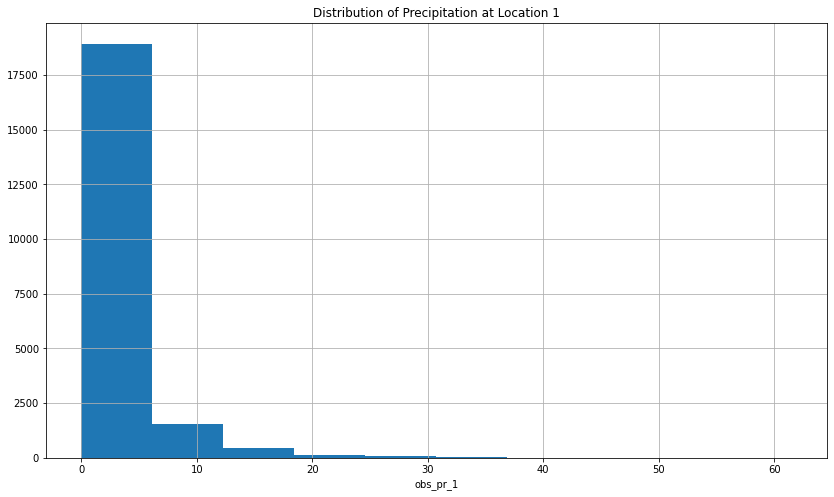

<Figure size 1008x576 with 0 Axes>

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [14, 8]
df.obs_pr_1.hist()
plt.title('Distribution of Precipitation at Location 1')
plt.xlabel('obs_pr_1')
plt.show()
plt.savefig("obs_pr_1-histogram")

These perceived outliers are in fact not unusual, but rather a consequence of usual precipitation 
patterns in the region. It makes sense that most days have no precipitation, and then some days have a lot.
Many underlying statistical methods assume a normal distribution of data, so it will be important to consider 
this later on.

# Part 2: Regression Analysis

In [ ]:
corr_vals = df.corr()[['flow']].sort_values('flow')
print(corr_vals)

                 flow
obs_pr_9_3   0.195579
obs_pr_9     0.200689
obs_pr_6_3   0.202490
obs_pr_9_2   0.204412
obs_pr_9_1   0.205278
...               ...
obs_tas_8    0.346066
obs_tas_3    0.347238
obs_tas_9_1  0.349347
obs_tas_9    0.353181
flow         1.000000

[73 rows x 1 columns]


Since the range of correlation coefficients between the indepenent variables and flow variable 
have a small range (0.200689 - 0.353181), I will not remove any input variables for my prediction.

In [ ]:
# make list of prediction features without desired variables

predictors = [var 
             for var in df.columns 
             if var not in ["flow", "date",
                            "obs_tas_1", "obs_tas_2", "obs_tas_3", 
                            "obs_tas_4", "obs_tas_5", "obs_tas_6", 
                            "obs_tas_7", "obs_tas_8", "obs_tas_9",
                            "obs_pr_1", "obs_pr_2", "obs_pr_3", 
                            "obs_pr_4", "obs_pr_5", "obs_pr_6", 
                            "obs_pr_7", "obs_pr_8", "obs_pr_9"
                            ]
            ]

df2 = df[['flow'] + predictors]

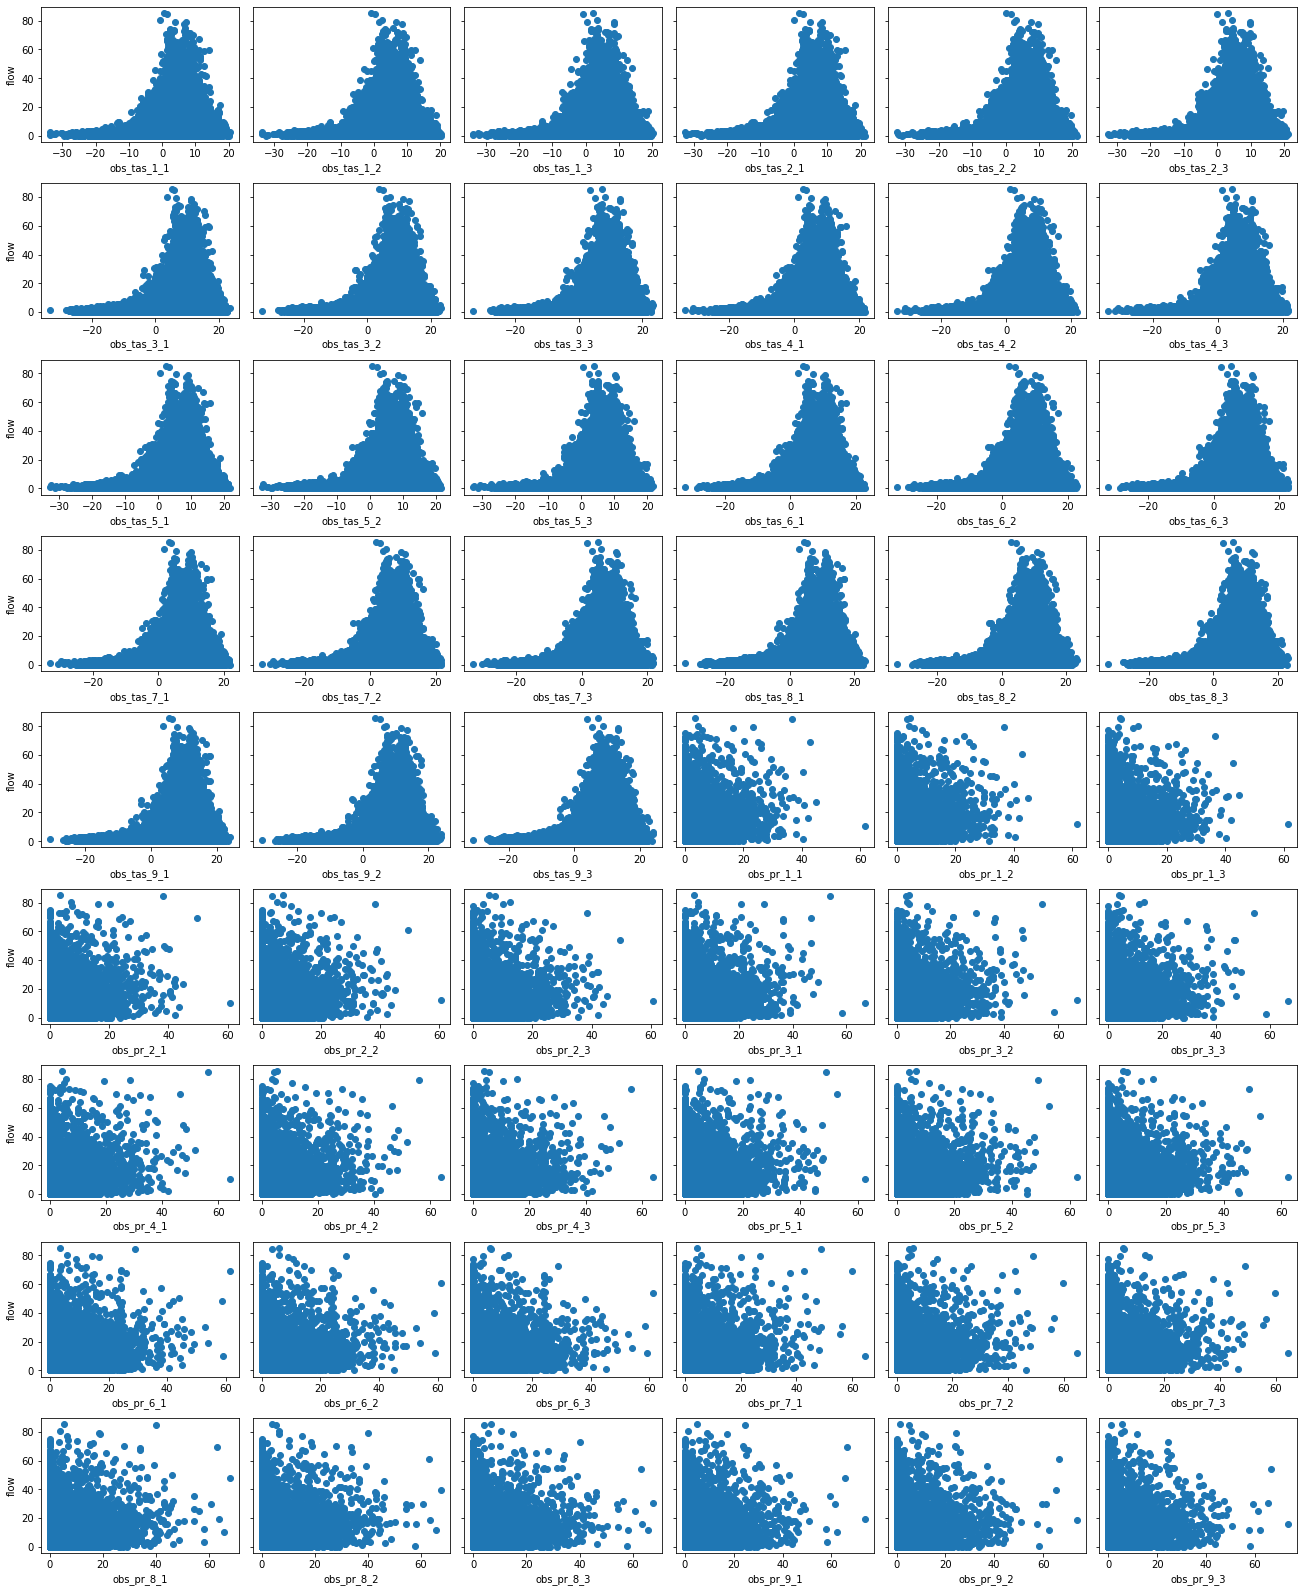

<Figure size 1296x1584 with 0 Axes>

In [ ]:
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [18, 22]

# call subplots specifying the grid structure we desire and that 
# the y axes should be shared
fig, axes = plt.subplots(nrows=9, ncols=6, sharey=True, constrained_layout=True)

# Since it would be nice to loop through the features in to build this plot
# let us rearrange our data into a 2D array of 9 rows and 6 columns
arr = np.array(predictors).reshape(9, 6)

# use enumerate to loop over the arr 2D array of rows and columns
# and create scatter plots of each flow vs each feature
for row, col_arr in enumerate(arr):
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(df2[feature], df2['flow'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='flow')
        else:
            axes[row, col].set(xlabel=feature)
plt.show()
plt.savefig("flow_prediction_var_corrs")

From the plots above it is apparent that none of the predictor variables have a 
linear relationship with the response variable (flow). That being said, all of the 
temperature predictor subplots show a left-skew distribution, whereas the precipitation 
predictor subplots' values are concentrated at values below 40 mm.

In [ ]:
# separate out my predictor variables (X) from my outcome variable y
# Also remove first 3 rows where X has NaN values
X = df2[predictors].dropna()
y = df2['flow'].drop([0, 1, 2])

## Create Linear Regression Model

In [ ]:
# import the relevant module
import statsmodels.api as sm

# Add a constant to the predictor variable set to represent the Bo intercept
X = sm.add_constant(X)
X.iloc[:5, :5]

# (1) select a significance value
alpha = 0.05

# (2) Fit the model
model = sm.OLS(endog = y, exog = X).fit()

# (3) evaluate the coefficients' p-values
model.summary()
print("Model Summary:")
print(model.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                   flow   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     113.3
Date:                Tue, 26 Jan 2021   Prob (F-statistic):               0.00
Time:                        19:18:43   Log-Likelihood:                -75389.
No. Observations:               21175   AIC:                         1.509e+05
Df Residuals:                   21120   BIC:                         1.513e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.2956      0.187  

# Part 3: Using SciKit-Learn & TensorFlow to Predict River Flow
<br><br>
## Import sklearn train_test_split Module

In [ ]:
from sklearn.model_selection import train_test_split

# first remove the const column because unlike statsmodels, SciKit-Learn will add that in for us
#X = X.drop('const', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

from sklearn.linear_model import LinearRegression

# instantiate the regressor class
regressor = LinearRegression()

# fit the build the model by fitting the regressor to the training data
regressor.fit(X_train, y_train)

# make a prediction set using the test set
prediction = regressor.predict(X_test)

Next, evaluate the prediction accuracy of the regression model.

In [ ]:
from sklearn.metrics import mean_absolute_error, median_absolute_error
print("The Explained Variance: %.2f" % regressor.score(X_test, y_test))
print("The Mean Absolute Error: %.2f m^3/s flow" % mean_absolute_error(y_test, prediction))
print("The Median Absolute Error: %.2f m^3/s flow" % median_absolute_error(y_test, prediction))

The Explained Variance: 0.23
The Mean Absolute Error: 5.36 m^3/s flow
The Median Absolute Error: 3.71 m^3/s flow


## Import TensorFlow Module

In [ ]:
import tensorflow as tf
from sklearn.metrics import explained_variance_score, \
    mean_absolute_error, \
    median_absolute_error
from sklearn.model_selection import train_test_split

In [ ]:
# Not neccessary, but if want to add date back to df:
#df2['date'] = pd.date_range(start='1/4/1958', periods=len(df2), freq='D')
# To set index of df to `date` column:
#df2.set_index('date')

# Remove rows 0,1,2 where Null values present for columns representing 
# precip. and temp. measurements from date-1, date-2, date-3 days
df2 = df2.drop([0,1,2])

Describe and Transpose `df2`:

In [ ]:
# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df2.describe().T
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21175 entries, 3 to 21177
Data columns (total 55 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flow         21175 non-null  float64
 1   obs_tas_1_1  21175 non-null  float64
 2   obs_tas_1_2  21175 non-null  float64
 3   obs_tas_1_3  21175 non-null  float64
 4   obs_tas_2_1  21175 non-null  float64
 5   obs_tas_2_2  21175 non-null  float64
 6   obs_tas_2_3  21175 non-null  float64
 7   obs_tas_3_1  21175 non-null  float64
 8   obs_tas_3_2  21175 non-null  float64
 9   obs_tas_3_3  21175 non-null  float64
 10  obs_tas_4_1  21175 non-null  float64
 11  obs_tas_4_2  21175 non-null  float64
 12  obs_tas_4_3  21175 non-null  float64
 13  obs_tas_5_1  21175 non-null  float64
 14  obs_tas_5_2  21175 non-null  float64
 15  obs_tas_5_3  21175 non-null  float64
 16  obs_tas_6_1  21175 non-null  float64
 17  obs_tas_6_2  21175 non-null  float64
 18  obs_tas_6_3  21175 non-null  float64
 19  obs_

Divide Data into Training and Testing Sets:

In [ ]:
# X will be a pandas dataframe of all columns except flow
X = df2[[col for col in df2.columns if col != 'flow']]

# y will be a pandas series of the flow
y = df2['flow']

# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))

Training instances   16940, Training features   54
Validation instances 2118, Validation features 54
Testing instances    2117, Testing features    54


Instantiate DNN Regressor Class:

In [ ]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


Define Weather Input Function:

In [ ]:
%%capture

def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return(
    tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                                  y=y,
                                                  num_epochs=num_epochs,
                                                  shuffle=shuffle,
                                                  batch_size=batch_size))

evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

Training Steps vs. Loss SSE Scatterplot:

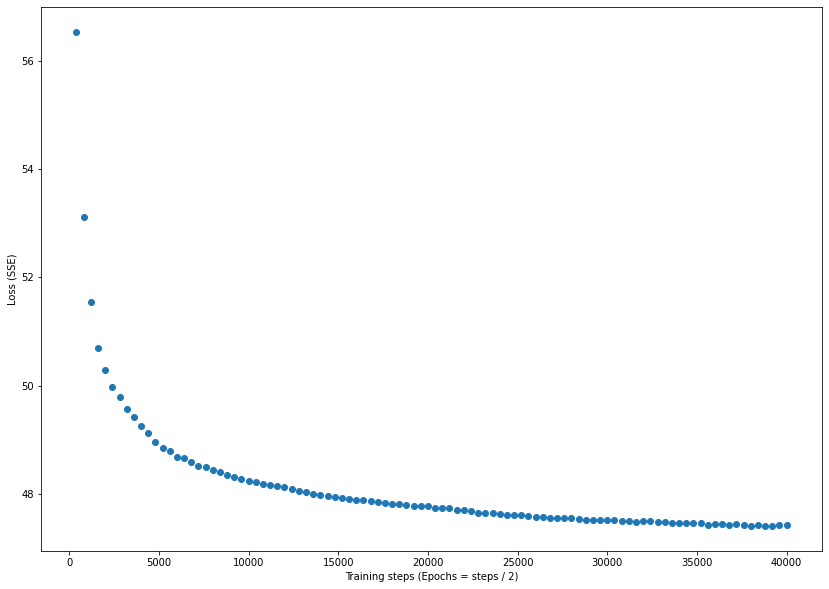

<Figure size 1008x720 with 0 Axes>

In [ ]:
%matplotlib inline
# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.title('Loss SSE vs. # Training Steps Scatterplot')
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()
plt.savefig("Loss_SSE_Graph")

From the above visualization, it looks like after 40,000 iterations the model is not overfitted, since the evaluation losses never exhibit a significant increase as the number of iterations increase.

Since the model is not overfitted, I can now create a numpy array to measure how accurate the predictions were compared to known `y_test` values.

In [ ]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))  

predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f m^3/s flow" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f m^3/s flow" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model/model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.38
The Mean Absolute Error: 4.58 m^3/s flow
The Median Absolute Error: 2.29 m^3/s flow


The Explained Variance: 0.38
The Mean Absolute Error: 4.59 m^3/s flow
The Median Absolute Error: 2.41 m^3/s flow

## View tensors in associated `checkpoint_file` for model:

In [ ]:
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
import os
#model_dir = "tf_wx_model"
#checkpoint_path = os.path.join(model_dir, "model.ckpt")

# modify checkpoint_path based on where tf_wx_model/model.ckpt-40000 is stored on your computer
checkpoint_path = "model.ckpt-40000"
#checkpoint_path = "/Users/ScottBurstein/Desktop/tf_wx_model/model.ckpt-40000"
#model.ckpt-40000.data-00000-of-00001

# List ALL tensors example output: v0/Adam (DT_FLOAT) [3,3,1,80]
print_tensors_in_checkpoint_file(file_name=checkpoint_path, tensor_name=all, all_tensors=True)

# List contents of v0 tensor.
# Example output: tensor_name:  v0 [[[[  9.27958265e-02   7.40226209e-02   4.52989563e-02   3.15700471e-02
print_tensors_in_checkpoint_file(file_name=checkpoint_path, tensor_name='v0', all_tensors=True)

# List contents of v1 tensor.
print_tensors_in_checkpoint_file(file_name=checkpoint_path, tensor_name='v1', all_tensors=True)

tensor: dnn/hiddenlayer_0/bias (float32) [50]
[-0.07932857  0.18847685 -0.05416158  0.16636005  0.15228967  0.05479636
  0.1854657  -0.09377528 -0.07956201  0.01505808 -0.21226025  0.02921776
  0.12468389 -0.1788859  -0.02455661 -0.21847002 -0.14311412 -0.20498519
  0.12994507 -0.18706393  0.21357024  0.18676865 -0.19358267  0.01979611
  0.12994602  0.09717976  0.1312416  -0.18987235 -0.14074843 -0.19641006
  0.10366774  0.17455156  0.06843494  0.19314064 -0.04420394  0.12789069
 -0.18364011 -0.23310253  0.09836528 -0.04685159  0.17491141  0.14897357
  0.25036517  0.17959107  0.15388305  0.16346444 -0.16408849  0.01961959
 -0.06843702  0.05934608]
tensor: dnn/hiddenlayer_0/kernel (float32) [54, 50]
[[-0.19400516  0.05376594 -0.15512721 ...  0.14303797  0.10566741
  -0.05298115]
 [-0.21320052 -0.02497059 -0.00866776 ...  0.19768831 -0.15054621
   0.00632384]
 [ 0.12759356 -0.05018328  0.11056849 ... -0.20183629 -0.09517623
  -0.05934755]
 ...
 [ 0.04512848  0.27061084  0.16680439 ... -0

## References:

Some of the important resources I used in the data preparation, analysis, and evaluation stages of this project:

https://towardsdatascience.com/weather-forecasting-with-data-science-approaches-cb8f2afd3f38

https://machinelearningmastery.com/make-predictions-scikit-learn/

https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn

https://stackabuse.com/using-machine-learning-to-predict-the-weather-part-1/

https://github.com/camblor/CodecademyMachineLearningFundamentals/blob/master/capstone_instructions.md

https://stackoverflow.com/questions/38218174/how-do-i-find-the-variable-names-and-values-that-are-saved-in-a-checkpoint

https://www.tensorflow.org/tutorials/keras/regression

https://pandas.pydata.org

https://arxiv.org/pdf/2008.10789.pdf